In [9]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,execute
from qiskit.tools.jupyter import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-05-04 11:05:36,932: Credentials are already in use. The existing account in the session will be replaced.


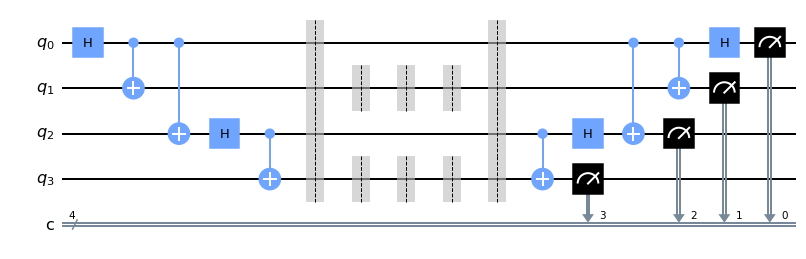

In [16]:
vote = [0,0,0,0]
qc = QuantumCircuit(4,4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.h(2)
qc.cx(2,3)

qc.barrier()
if(vote[0]):
    qc.x(1)
    qc.z(2)
    qc.x(2)
qc.barrier(1,3)
if(vote[1]):
    qc.x(1)
    qc.z(2)
qc.barrier(1,3)
if(vote[2]):
    qc.z(1)
    qc.x(1)
    qc.z(2)
qc.barrier(1,3)
if(vote[3]):
    qc.z(1)
    qc.x(1)
    qc.z(2)
    qc.x(2)
qc.barrier()
qc.cx(2,3)
qc.h(2)
qc.cx(0,2)
qc.cx(0,1)
qc.h(0)
qc.measure(range(4),range(4))
qc.draw()

In [17]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(qc,backend,shots=1024)
results = job_simulator.result()
count = results.get_counts(qc)
print(count)

{'0000': 1024}


In [18]:
if '0000' in count:
    print('Inconcluive')
else:
    print('Vetoed')

Inconcluive
